In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as linearReg
from sklearn.model_selection import train_test_split
import random

sns.set()

In [16]:
df = pd.read_csv("./test_scores.csv")
# df.head(5)

school_type_public = df[df["school_type"] == "Public"]
school_type_non_public = df[df["school_type"] == "Non-public"]
school_type_non_public.head(2)


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0


### 1. Compare between public and non-public students who have not lunch for free.

,school_type,n_student,pretest,posttest
0,Non-public,18.450382,67.071247,79.399491
1,Public,22.880779,60.007299,71.973236


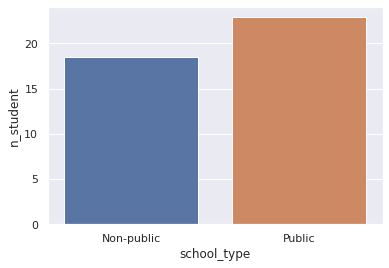

In [17]:
no_lunch = df[df.lunch == 'Does not qualify']
combine = no_lunch.groupby("school_type", as_index=False).mean()
bar = sns.barplot(x="school_type", y="n_student", data=combine)
combine



In [24]:
# df.head(1)
# n = random.randint(0,4000)
# df['student_id'] = random.randint(0, 3500)
# test_random = df['student_id']
df['n_student']


0       20.0
1       20.0
2       20.0
3       20.0
4       20.0
        ... 
2128    30.0
2129    30.0
2130    30.0
2131    30.0
2132    30.0
Name: n_student, Length: 2133, dtype: float64

### 2. Give me students score in posttest and pretest

In [48]:
# X = df[df['posttest']>= 50 ]
X = df['posttest'].values.reshape(-1,1)
# # X = df[df.posttest >= 50].values.reshape(-1,1)
# X
y = df['pretest'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 4)

In [49]:

linear = linearReg()
linear.fit(x_train, y_train)

LinearRegression()

In [54]:

y_predict = linear.predict(x_test) # to use it with the line
print(f'test accuracy: {linear.score(x_test, y_test)*100}')
print(f'train accuracy: {linear.score(x_train, y_train)*100}')


test accuracy: 90.08153282447171
train accuracy: 90.48504955830819


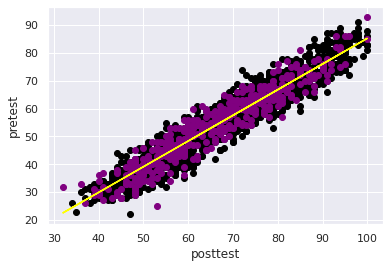

In [58]:

plt.scatter(x_train, y_train, color='black')
plt.scatter(x_test, y_test, color='purple')
plt.plot(x_test, y_predict, color='yellow')
plt.xlabel('posttest')
plt.ylabel('pretest')
plt.show()

In [ ]:
### Sum of the gender, and the n_student

   gender  n_student  pretest  posttest
0  Female    24160.0  57946.0   70757.0
1    Male    24465.0  59275.0   72372.0


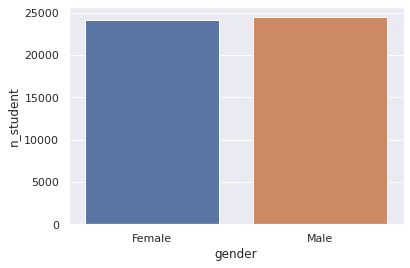

In [105]:
school_type = df["school_type"].value_counts()
publicn = school_type["Public"]
non_publicn = school_type["Non-public"]
non_publicn

data = df.groupby("gender", as_index=False).sum()
print(data)
bar = sns.barplot(x="gender", y="n_student", data=data)